In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
# cargo el dataset
file_path = './dataset_ficticio_500_registros.csv'
data = pd.read_csv(file_path)

# doy una muestra del set de datos
data.head()

,Jugador,Frecuencia Promedio (bpm),Velocidad Máxima (km/h),Distancia Recorrida (km),Horas Entrenamiento (semanal),Historial de Lesiones
0,Jugador 1,159,34.6,10.3,8,0
1,Jugador 1,177,27.3,10.1,6,1
2,Jugador 1,174,25.6,11.3,9,3
3,Jugador 1,136,31.5,10.4,5,0
4,Jugador 1,178,23.3,13.4,5,2


In [ ]:
# Ppraparo par la regresion
X = data[['Horas Entrenamiento (semanal)', 'Frecuencia Promedio (bpm)']]
y = 0.5 * data['Horas Entrenamiento (semanal)'] + 0.3 * data['Frecuencia Promedio (bpm)']

# creo la columna riego en el dataset
data['Riesgo'] = y



In [ ]:
# Fentrenamo la regresion simple
model = LinearRegression()
model.fit(X, y)

LinearRegression()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


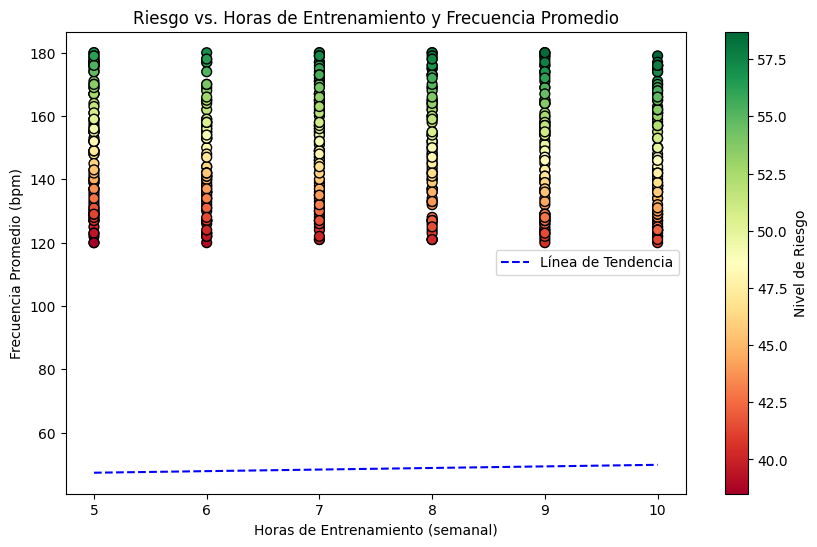

In [ ]:
# Ccreamos un scatter para ver los resultado
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    data['Horas Entrenamiento (semanal)'],
    data['Frecuencia Promedio (bpm)'],
    c=data['Riesgo'],
    cmap='RdYlGn',
    edgecolor='k',
    s=50
)

# cambiamos los colores segun el niuvel de riessgo
plt.colorbar(scatter, label='Nivel de Riesgo')
plt.title('Riesgo vs. Horas de Entrenamiento y Frecuencia Promedio')
plt.xlabel('Horas de Entrenamiento (semanal)')
plt.ylabel('Frecuencia Promedio (bpm)')

# mostramos al regresion en el grafico
x_vals = np.linspace(data['Horas Entrenamiento (semanal)'].min(), data['Horas Entrenamiento (semanal)'].max(), 100)
y_vals = model.predict(np.column_stack([x_vals, np.mean(data['Frecuencia Promedio (bpm)']) * np.ones(100)]))
plt.plot(x_vals, y_vals, color='blue', linestyle='--', label='Línea de Tendencia')
plt.legend()

plt.show()